In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import os, sys
exec(open("init_notebook.py").read())
from DataTools import DataTools
from Extractor import Extractor
from DataCleaner import DataCleaner
from RepoTools import RepoTools

current working dir/Volumes/Zarif/myStuff/research/repoPaper/src


In [2]:
%load_ext autoreload
%autoreload 2

### Load all the necessary datasets 

In [50]:
# mainDataSet
mainDatasetPath = os.path.join(os.curdir, "../data/mainData.csv")
companyDf = pd.read_csv(mainDatasetPath)

# companyToRepos
companyToRepos = Extractor.getConfig()

# DataByCIDAndYear
dataByCidYear = DataTools.loadCSVFromOutput('finalStuff/DataByCIDAndYearV2')

# matched_papers
matchedPapersInfo = DataTools.loadCSVFromOutput('finalStuff/matched_papersV2')

# pwc
pwc = pwc = pd.read_csv(os.path.join(os.pardir, 'data/papersWithCode.csv'))

# Paper Titles Matched By PWC and companyDf
paperTitles = [title.lower() for title in companyDf['Title']]
matchedPapersInPWC = pwc[pwc['paper_title'].str.lower().isin(paperTitles)]

# getting all the matches having company usernames
usernames = []
for _ in companyToRepos:
    a = ['/' + username + '/' for username in _['repos']]
    usernames.extend(a)
    
matchedHavingUsername = matchedPapersInPWC[matchedPapersInPWC.repo_url.str.contains('|'.join(usernames))]

# companyPWC
companyPWC = pwc[pwc.repo_url.str.contains('|'.join(usernames))]

# matched papers in pwc having company usernames and mentioning paper in the github
matchedHavingUsernameAndGithubMention = matchedHavingUsername[matchedHavingUsername.mentioned_in_github==True]

In [49]:
len(pwc)

185394

In [13]:
def getPath(filename):
    return os.path.join(os.curdir, '../figs/' + filename)

### Pi Chart For Number of Company with N users

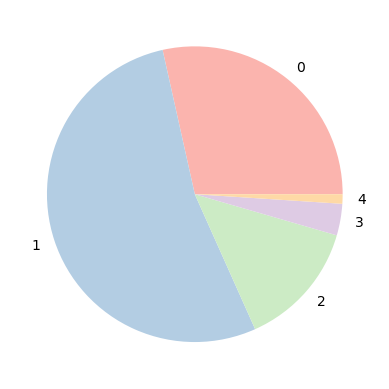

In [22]:
nUsers = []
for _ in companyToRepos:
    nUsers.append(len(_['repos']))
    
nUsersTonCompanies = {0:0, 1:0, 2:0, 3:0, 4:0}
for nUser in nUsers:
    nUsersTonCompanies[nUser] += 1
  
labels = ['0', '1', '2', '3', '4']
data = nUsersTonCompanies.values()
palette_color = sns.color_palette('Pastel1')
plt.pie(data, labels=labels, colors=palette_color)
# plt.show()
sns.set_context('paper')
plt.savefig(getPath('pichart.png'), dpi=300, bbox_inches='tight', transparent=True)

###  finding the top users in company papers having paper mentioned in github

In [54]:
repo_urls = list(companyPWC[companyPWC.mentioned_in_github == True].repo_url)
import re
link_pattern = r'https://github.com/([\w\-]*)/[\w\-]*'

usernames = [re.findall(link_pattern, repo_url)[0] for repo_url in repo_urls if len(re.findall(link_pattern, repo_url)) > 0]
from collections import Counter
usernames_count = Counter(usernames)
usernames_count.most_common()

[('facebookresearch', 979),
 ('microsoft', 481),
 ('google-research', 259),
 ('google', 160),
 ('IBM', 141),
 ('salesforce', 112),
 ('deepmind', 104),
 ('amazon-research', 81),
 ('openai', 59),
 ('huawei-noah', 55),
 ('NVIDIA', 48),
 ('apple', 43),
 ('boschresearch', 43),
 ('kakaobrain', 39),
 ('pfnet-research', 37),
 ('alibaba', 34),
 ('uber-research', 33),
 ('naver', 32),
 ('asappresearch', 21),
 ('amzn', 21),
 ('LLNL', 19),
 ('facebook', 18),
 ('bytedance', 18),
 ('nttcslab', 17),
 ('tencent-ailab', 15),
 ('Tencent', 14),
 ('snap-research', 13),
 ('adobe-research', 13),
 ('intel', 13),
 ('SamsungLabs', 12),
 ('uber', 11),
 ('baidu', 11),
 ('sony', 11),
 ('yahoo', 10),
 ('TRI-ML', 10),
 ('baidu-research', 9),
 ('ARM-software', 9),
 ('rigetti', 9),
 ('kakaoenterprise', 9),
 ('AutodeskAILab', 7),
 ('AstraZeneca', 7),
 ('jpmorganchase', 6),
 ('mozilla', 6),
 ('SAP', 6),
 ('eBay', 6),
 ('dwave-examples', 5),
 ('Qualcomm-AI-research', 5),
 ('aliyun', 5),
 ('bayer-science-for-a-better-life

In [52]:
###  finding the top users in company papers having paper not mentioned in github

In [55]:
repo_urls = list(companyPWC[companyPWC.mentioned_in_github == False].repo_url)
import re
link_pattern = r'https://github.com/([\w\-]*)/[\w\-]*'

usernames = [re.findall(link_pattern, repo_url)[0] for repo_url in repo_urls if len(re.findall(link_pattern, repo_url)) > 0]
from collections import Counter
usernames_count = Counter(usernames)
usernames_count.most_common()

[('google-research', 381),
 ('facebookresearch', 249),
 ('microsoft', 205),
 ('deepmind', 115),
 ('alibaba', 91),
 ('google', 71),
 ('IBM', 61),
 ('huawei-noah', 59),
 ('amazon-research', 38),
 ('NVIDIA', 37),
 ('boschresearch', 27),
 ('openai', 27),
 ('salesforce', 22),
 ('naver', 22),
 ('bytedance', 14),
 ('amzn', 11),
 ('apple', 10),
 ('baidu', 10),
 ('siemens', 9),
 ('Accenture', 9),
 ('pfnet-research', 8),
 ('baidu-research', 7),
 ('tencent-ailab', 7),
 ('AstraZeneca', 7),
 ('SamsungLabs', 7),
 ('uber-research', 6),
 ('sony', 5),
 ('nttcslab', 5),
 ('bloomberg', 5),
 ('huggingface', 5),
 ('sandialabs', 4),
 ('asappresearch', 4),
 ('Tencent', 4),
 ('oracle', 3),
 ('uber', 3),
 ('mitre', 3),
 ('mozilla', 3),
 ('ydataai', 3),
 ('LLNL', 3),
 ('kakaobrain', 3),
 ('snap-research', 2),
 ('ThalesGroup', 2),
 ('pearsonlab', 2),
 ('linkedin', 2),
 ('awslabs', 2),
 ('didi', 2),
 ('LS-Lab', 2),
 ('bigvideoresearch', 2),
 ('yandex', 2),
 ('ARM-software', 2),
 ('jherekhealy', 2),
 ('adobe-resea

###  finding the top users in our finding

In [61]:
repo_urls = list(matchedPapersInfo.repo_link)
import re
link_pattern = r'https://github.com/([\w\-]*)/[\w\-]*'

usernames = [re.findall(link_pattern, repo_url)[0] for repo_url in repo_urls if len(re.findall(link_pattern, repo_url)) > 0]
from collections import Counter
usernames_count = Counter(usernames)
usernames_count.most_common()

[('microsoft', 259),
 ('facebookresearch', 161),
 ('IBM', 113),
 ('google-research', 101),
 ('google', 77),
 ('deepmind', 47),
 ('NVlabs', 43),
 ('pfnet-research', 19),
 ('apple', 17),
 ('Tencent', 17),
 ('openai', 16),
 ('NVIDIA', 13),
 ('Xilinx', 12),
 ('alibaba', 11),
 ('bytedance', 11),
 ('nttcslab', 11),
 ('linkedin', 10),
 ('uber-research', 10),
 ('asappresearch', 8),
 ('amzn', 8),
 ('nec-research', 8),
 ('tencent-ailab', 8),
 ('AstraZeneca', 7),
 ('baidu-research', 5),
 ('boschresearch', 5),
 ('salesforce', 5),
 ('AutodeskAILab', 4),
 ('bayer-science-for-a-better-life', 4),
 ('Kitware', 4),
 ('naver', 4),
 ('snap-research', 4),
 ('waymo-research', 4),
 ('adobe-research', 3),
 ('bloomberg', 3),
 ('HewlettPackard', 3),
 ('DensoITLab', 3),
 ('GrammaTech', 3),
 ('softbankrobotics-research', 3),
 ('SRI-CSL', 3),
 ('yahoo', 3),
 ('eBay', 3),
 ('google-research-datasets', 3),
 ('ARM-software', 2),
 ('adobe', 2),
 ('mouna99', 2),
 ('baidu', 2),
 ('Ford', 2),
 ('pzzhang', 2),
 ('namisan'

In [77]:
a = Extractor.loadCSVFromOutput(['Huawei']).iloc[17].title

In [74]:
b = companyPWC[companyPWC.repo_url.str.contains('huawei-noah/')].iloc[1].paper_title

In [73]:
matchedPapersInfo[matchedPapersInfo.repo_link.str.contains('huawei')]

,Company,EID,CID,Title,Year,Abstract,created_at,name,Full Name,Forks,Stars,Watchers,Commits,Branches,Contributors,Open Issues,PullRequests,YearCreated,repo_link


In [78]:
a

'BOiLS: Bayesian Optimisation for Logic Synthesis'

In [79]:
b

'BOiLS: Bayesian Optimisation for Logic Synthesis'

In [89]:
c

'BOiLS: Bayesian Optimisation for Logic Synthesis'

In [88]:
c = companyDf[companyDf['Title'].str.contains('BOiLS')].iloc[0].Title

In [91]:
a.lower()==c.lower() 


True

###  We fix this tomorrow